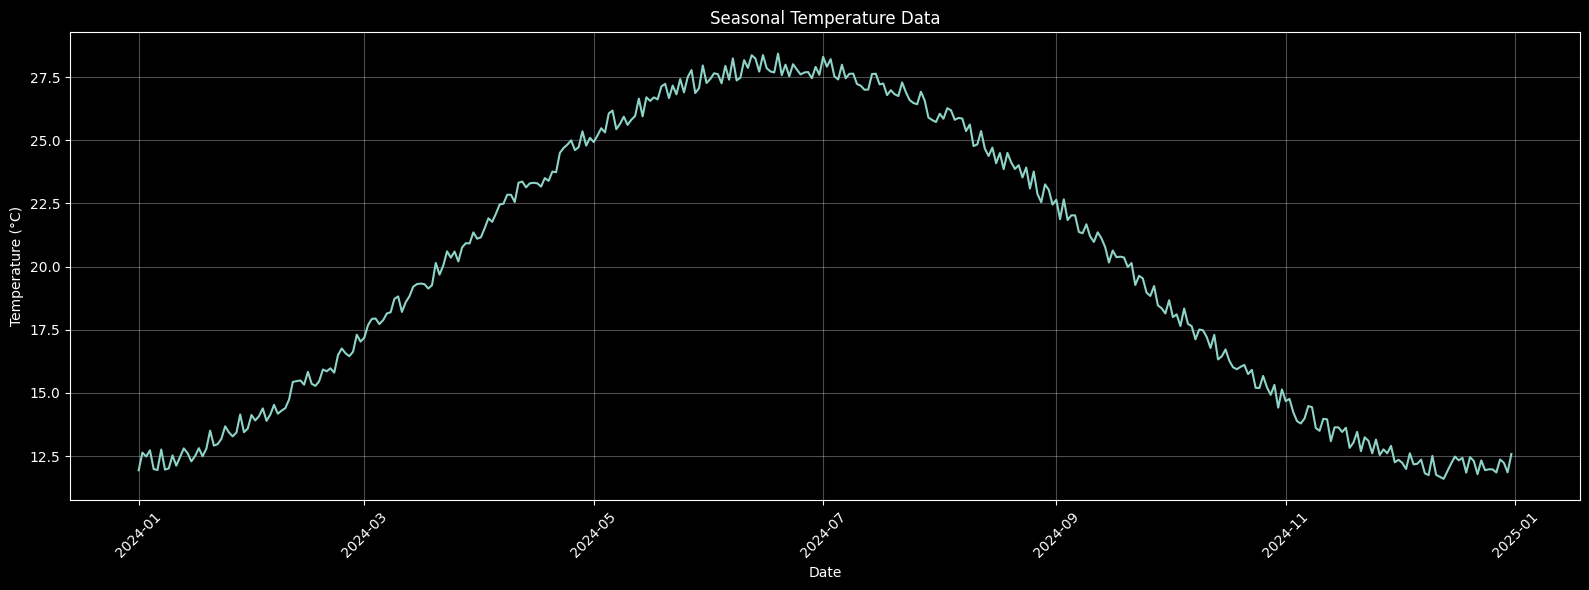

In [9]:
from mock import create_temperature
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

df = create_temperature("2024-01-01","2024-12-31",12,28,0.5)

plt.figure(figsize=(16, 6))
plt.plot(df['date'], df['temperature'])
plt.title('Seasonal Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
temps: np.ndarray = np.arange(10, 30)  # 10-29°C
weights: np.ndarray = np.arange(5, 501, 5)  # 5-500g in 5g steps
  
temp_grid, weight_grid = np.meshgrid(temps, weights)
optimal_temp = 22
temp_factor = np.exp(-0.5 * ((temp_grid - optimal_temp) / 4) ** 2)
weight_factor = 8 * (weight_grid ** -0.3)

sfr_rates = temp_factor * weight_factor
df = pl.DataFrame({
    'temperature': temp_grid.flatten(),
    'weight': weight_grid.flatten(),
    'sfr_rate': sfr_rates.flatten()
  })
df

temperature,weight,sfr_rate
i64,i64,f64
10,5,0.054837
11,5,0.112518
12,5,0.216885
13,5,0.392727
14,5,0.668052
…,…,…
25,500,0.935952
26,500,0.752059
27,500,0.567684
